# Ejercicio 5.3

El objetivo de este proyecto es identificar jerarquías de grupos de estados de EE. UU. Según los datos de tasas de delitos violentos. Importamos el dataset para hacer analizar.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


crime = pd.read_csv("https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectUSA/data/violent_crime.csv")

print(crime.describe(),'\n')
print(crime.columns,'\n')
print(crime.shape)

         Murder     Assault   UrbanPop       Rape
count  50.00000   50.000000  50.000000  50.000000
mean    7.78800  170.760000  65.540000  21.232000
std     4.35551   83.337661  14.474763   9.366385
min     0.80000   45.000000  32.000000   7.300000
25%     4.07500  109.000000  54.500000  15.075000
50%     7.25000  159.000000  66.000000  20.100000
75%    11.25000  249.000000  77.750000  26.175000
max    17.40000  337.000000  91.000000  46.000000 

Index(['Unnamed: 0', 'Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object') 

(50, 5)


Agregamos una columna numérica para represetar a los distintos estados de USA.

In [2]:
rows, cols = crime.shape
print(rows)

crime['ref'] = range(0,rows)
print(crime.head(),'\n')

crime2 = crime.rename(columns={'Unnamed: 0':'state'})
print(crime2.columns,'\n')
print(crime2.head(),'\n')

cri = crime.drop(columns='Unnamed: 0')
print(cri.head())


50
   Unnamed: 0  Murder  Assault  UrbanPop  Rape  ref
0     Alabama    13.2      236        58  21.2    0
1      Alaska    10.0      263        48  44.5    1
2     Arizona     8.1      294        80  31.0    2
3    Arkansas     8.8      190        50  19.5    3
4  California     9.0      276        91  40.6    4 

Index(['state', 'Murder', 'Assault', 'UrbanPop', 'Rape', 'ref'], dtype='object') 

        state  Murder  Assault  UrbanPop  Rape  ref
0     Alabama    13.2      236        58  21.2    0
1      Alaska    10.0      263        48  44.5    1
2     Arizona     8.1      294        80  31.0    2
3    Arkansas     8.8      190        50  19.5    3
4  California     9.0      276        91  40.6    4 

   Murder  Assault  UrbanPop  Rape  ref
0    13.2      236        58  21.2    0
1    10.0      263        48  44.5    1
2     8.1      294        80  31.0    2
3     8.8      190        50  19.5    3
4     9.0      276        91  40.6    4


Visualizamos el histograma correspondiente a los distintos features.

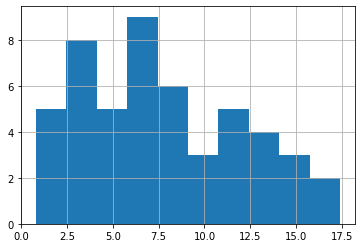

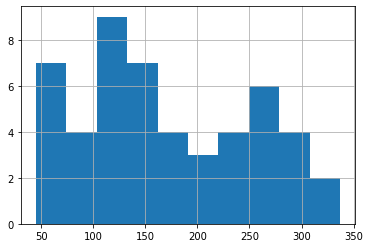

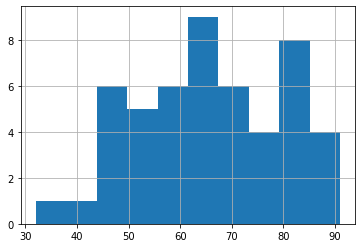

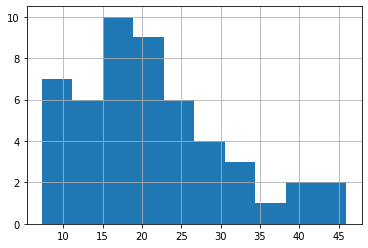

In [3]:
hist1=cri['Murder'].hist()
plt.show(hist1)

hist2=cri['Assault'].hist()
plt.show(hist2)

hist3=cri['UrbanPop'].hist()
plt.show(hist3)

hist4=cri['Rape'].hist()
plt.show(hist4)

Separamos el dataset original en dos subconjuntos para luego poder evaluar la performance del clustering.

In [4]:
from sklearn.model_selection import train_test_split

datafr = cri.drop(columns='ref')
print(datafr.shape)
target = cri['ref']

train_cri, test_cri, train_tar, test_tar = train_test_split(datafr, target, test_size=0.2)
print(train_cri.shape)
print(test_cri.shape)
print(train_tar.shape)
print(test_tar.shape)

(50, 4)
(40, 4)
(10, 4)
(40,)
(10,)


Aplicamos el método de agrupamiento k-means a todo el dataset buscando el valor de "k" intentando encontrar el punto óptimo entre n° de cluster y el score de clusterización.

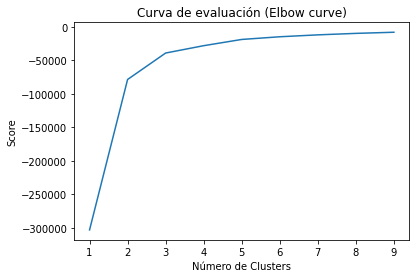

In [5]:
from sklearn.cluster import KMeans

n = range(1,10)     #Establecemos un rango en la cantidad de clusters a evaluar

km = [KMeans(n_clusters = i, random_state=1) for i in n]
km

score = [km[i].fit(train_cri).score(train_cri) for i in range(len(km))]
score

plt.plot(n,score)
plt.xlabel('Número de Clusters')
plt.ylabel('Score')
plt.title('Curva de evaluación (Elbow curve)')
plt.show()

A partir de la curva elaborada identificamos visualmente que el número óptimo de clusters para agrupar es 3 (k=3). Volvemos a ejecutar el algoritmo para calcular los centroides.

In [6]:
km = KMeans(n_clusters=3, random_state=1).fit(train_cri)
centroides = km.cluster_centers_
print(centroides)

[[ 11.79230769 276.53846154  69.76923077  30.26923077]
 [  4.52352941  88.58823529  57.82352941  14.07058824]
 [  8.08       172.9         71.4         25.01      ]]


Ahora le ponemos colores a los distintos grupos y veremos si se diferencian:

In [7]:
etiq = km.predict(test_cri)      #Predecimos los cluster dentro del dataset trabajado

center =  km.cluster_centers_     #Obtenemos los centroides de cada cluster
colores = ['red','blue','green']
asignar = []

for row in etiq:
  asignar.append(colores[row])

Hacemos gráficos 3D para visualizar la distribución de los cluster y los centroides en el espacio de atributos.

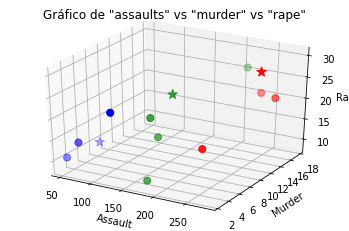

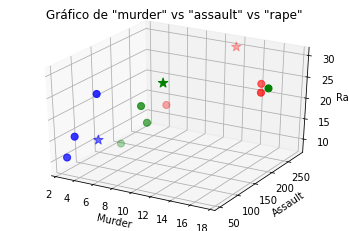

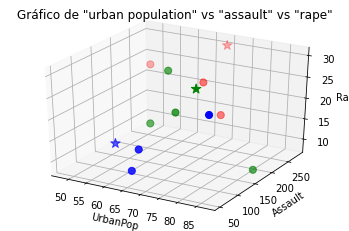

In [9]:
fig8 = plt.figure()
ax = fig8.add_subplot(projection='3d')
ax.scatter(test_cri['Assault'], test_cri['Murder'], test_cri['Rape'], c=asignar, s=50)
ax.scatter(center[:,1], center[:,0], center[:,3], marker='*', c=colores, s=100)
ax.set_xlabel('Assault')
ax.set_ylabel('Murder')
ax.set_zlabel('Rape')
plt.title('Gráfico de "assaults" vs "murder" vs "rape"')
plt.show(fig8)

fig9 = plt.figure()
ax = fig9.add_subplot(projection='3d')
ax.scatter(test_cri['Murder'], test_cri['Assault'], test_cri['Rape'], c=asignar, s=50)
ax.scatter(center[:,0], center[:,1], center[:,3], marker='*', c=colores, s=100)
ax.set_xlabel('Murder')
ax.set_ylabel('Assault')
ax.set_zlabel('Rape')
plt.title('Gráfico de "murder" vs "assault" vs "rape"')
plt.show(fig9)

fig10 = plt.figure()
ax = fig10.add_subplot(projection='3d')
ax.scatter(test_cri['UrbanPop'], test_cri['Assault'], test_cri['Rape'], c=asignar, s=50)
ax.scatter(center[:,2], center[:,1], center[:,3], marker='*', c=colores, s=100)
ax.set_xlabel('UrbanPop')
ax.set_ylabel('Assault')
ax.set_zlabel('Rape')
plt.title('Gráfico de "urban population" vs "assault" vs "rape"')
plt.show(fig10)


Evaluamos algunos índices de performance de la clusterización.

In [10]:
from sklearn import metrics

homo = metrics.homogeneity_score(test_tar,etiq)
comp = metrics.completeness_score(test_tar,etiq)
v_meas = metrics.v_measure_score(test_tar,etiq)
rand_i = metrics.adjusted_rand_score(test_tar,etiq)
mut_inf = metrics.adjusted_mutual_info_score(test_tar,etiq)

print('La homogeneidad de los clusters resultantes es:', homo)
print('La completitud de los clusters resultantes es:', comp)
print('La media armonica (V-measure) de los clusters resultantes es:',v_meas)
print('El índice de Rand ajustado de los clusters resultantes es:', rand_i)
print('El índice ajustado de información mutua de los clusters resultantes es:', mut_inf)

La homogeneidad de los clusters resultantes es: 0.4729032506370175
La completitud de los clusters resultantes es: 0.9999999999999998
La media armonica (V-measure) de los clusters resultantes es: 0.642137561217943
El índice de Rand ajustado de los clusters resultantes es: 0.0
El índice ajustado de información mutua de los clusters resultantes es: -7.318030078680742e-16


Los grupos (clusters) generados mediante el algoritmo K-Means son los siguientes.

In [12]:
res_km = km.predict(datafr)
print(res_km,'\n')

cluster1 = []
cluster2 = []
cluster3 = []
for x in range(len(res_km)):
    if res_km[x] == 0:
      cluster1.append(crime2.state[x])
    if res_km[x] == 1:
      cluster2.append(crime2.state[x])
    if res_km[x] == 2:
      cluster3.append(crime2.state[x])
print(cluster1)
print(cluster2)
print(cluster3,'\n')

[0 0 0 2 0 2 1 0 0 2 1 1 0 1 1 1 1 0 1 0 2 0 1 0 2 1 1 0 1 2 0 0 0 1 1 2 2
 1 2 0 1 2 2 1 1 2 2 1 1 2] 

['Alabama', 'Alaska', 'Arizona', 'California', 'Delaware', 'Florida', 'Illinois', 'Louisiana', 'Maryland', 'Michigan', 'Mississippi', 'Nevada', 'New Mexico', 'New York', 'North Carolina', 'South Carolina']
['Connecticut', 'Hawaii', 'Idaho', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Maine', 'Minnesota', 'Montana', 'Nebraska', 'New Hampshire', 'North Dakota', 'Ohio', 'Pennsylvania', 'South Dakota', 'Utah', 'Vermont', 'West Virginia', 'Wisconsin']
['Arkansas', 'Colorado', 'Georgia', 'Massachusetts', 'Missouri', 'New Jersey', 'Oklahoma', 'Oregon', 'Rhode Island', 'Tennessee', 'Texas', 'Virginia', 'Washington', 'Wyoming'] 



Teniendo estos resultados de base vamos a probar otros algoritmos. A continuación trabajamos el dataset mediante el algoritmo Mean Shift de clusterización. 

In [13]:
from sklearn.cluster import MeanShift

ms = MeanShift()
ms.fit(train_cri)

etiq2 = ms.predict(test_cri)      #Predecimos los cluster dentro del dataset trabajado

center2 = ms.cluster_centers_     #Obtenemos los centroides de cada cluster
print(center2)


[[  5.5        118.94117647  64.          17.11764706]
 [ 10.10769231 206.23076923  72.15384615  27.69230769]
 [ 11.35454545 265.72727273  71.09090909  31.40909091]]


Luego de testear el modelo graficamos los resultados.

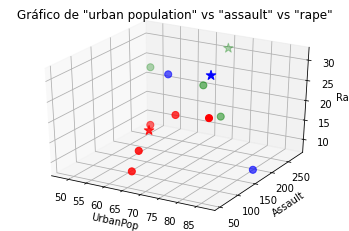

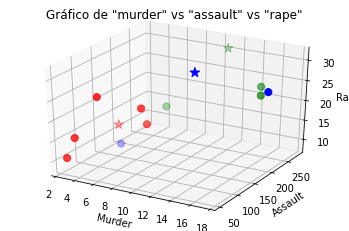

In [14]:
colores = ['red','blue','green']
asignar2 = []

for row in etiq2:
  asignar2.append(colores[row])

fig11 = plt.figure()
ax = fig11.add_subplot(projection='3d')
ax.scatter(test_cri['UrbanPop'], test_cri['Assault'], test_cri['Rape'], c=asignar2, s=50)
ax.scatter(center2[:,2], center2[:,1], center2[:,3], marker='*', c=colores, s=100)
ax.set_xlabel('UrbanPop')
ax.set_ylabel('Assault')
ax.set_zlabel('Rape')
plt.title('Gráfico de "urban population" vs "assault" vs "rape"')
plt.show(fig11)

fig12 = plt.figure()
ax = fig12.add_subplot(projection='3d')
ax.scatter(test_cri['Murder'], test_cri['Assault'], test_cri['Rape'], c=asignar2, s=50)
ax.scatter(center2[:,0], center2[:,1], center2[:,3], marker='*', c=colores, s=100)
ax.set_xlabel('Murder')
ax.set_ylabel('Assault')
ax.set_zlabel('Rape')
plt.title('Gráfico de "murder" vs "assault" vs "rape"')
plt.show(fig9)

Por último evaluamos las métricas de este modelo para poder realizar una comparación y determinar que resultado se ajusta mejor al dataset.

In [15]:
homo2 = metrics.homogeneity_score(test_tar,etiq2)
comp2 = metrics.completeness_score(test_tar,etiq2)
v_meas2 = metrics.v_measure_score(test_tar,etiq2)
rand_i2 = metrics.adjusted_rand_score(test_tar,etiq2)
mut_inf2 = metrics.adjusted_mutual_info_score(test_tar,etiq2)

print('La homogeneidad de los clusters resultantes es:', homo2)
print('La completitud de los clusters resultantes es:', comp2)
print('La media armonica (V-measure) de los clusters resultantes es:',v_meas2)
print('El índice de Rand ajustado de los clusters resultantes es: ', rand_i2)
print('El índice ajustado de información mutua de los clusters resultantes es:', mut_inf2)

La homogeneidad de los clusters resultantes es: 0.44717262228329563
La completitud de los clusters resultantes es: 1.0
La media armonica (V-measure) de los clusters resultantes es: 0.6179948617017963
El índice de Rand ajustado de los clusters resultantes es:  0.0
El índice ajustado de información mutua de los clusters resultantes es: -1.3954843850695929e-15


Los grupos (clusters) generados por el algoritmo Mean Shift son los siguientes.

In [17]:
res_ms = ms.predict(datafr)
print(res_ms,'\n')

cluster4 = []
cluster5 = []
cluster6 = []
for x in range(len(res_ms)):
    if res_ms[x] == 0:
      cluster4.append(crime2.state[x])
    if res_ms[x] == 1:
      cluster5.append(crime2.state[x])
    if res_ms[x] == 2:
      cluster6.append(crime2.state[x]) 
print(cluster4)
print(cluster5)
print(cluster6,'\n')

[1 2 2 1 2 1 0 2 2 1 0 0 2 0 0 0 0 2 0 2 0 2 0 2 1 0 0 2 0 0 2 2 2 0 0 0 0
 0 1 2 0 1 1 0 0 0 0 0 0 0] 

['Connecticut', 'Hawaii', 'Idaho', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Maine', 'Massachusetts', 'Minnesota', 'Montana', 'Nebraska', 'New Hampshire', 'New Jersey', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'South Dakota', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming']
['Alabama', 'Arkansas', 'Colorado', 'Georgia', 'Missouri', 'Rhode Island', 'Tennessee', 'Texas']
['Alaska', 'Arizona', 'California', 'Delaware', 'Florida', 'Illinois', 'Louisiana', 'Maryland', 'Michigan', 'Mississippi', 'Nevada', 'New Mexico', 'New York', 'North Carolina', 'South Carolina'] 



A continuación vamos a tester el algoritmo Affinity Propagation.

In [18]:
from sklearn.cluster import AffinityPropagation

af_prop = AffinityPropagation(preference =-50).fit(train_cri)

etiq3 = af_prop.predict(test_cri)     #Predecimos los cluster dentro del dataset trabajado

center3 = af_prop.cluster_centers_     #Obtenemos los centroides de cada cluster
n_clust = len(af_prop.cluster_centers_indices_)
print(center3,'\n')
print('El número de cluster obtenido por el algoritmo es:', n_clust)

[[ 13.2 236.   58.   21.2]
 [  7.4 159.   89.   18.8]
 [ 15.4 335.   80.   31.9]
 [  4.4 149.   85.   16.3]
 [  0.8  45.   44.    7.3]
 [ 13.  337.   45.   16.1]
 [  4.9 159.   67.   29.3]
 [  2.2  48.   32.   11.2]
 [  3.3 110.   77.   11.1]
 [  8.5 156.   63.   20.7]
 [ 12.2 252.   81.   46. ]
 [  4.3 102.   62.   16.5]
 [  2.1  83.   51.    7.8]
 [  3.8  86.   45.   12.8]
 [  2.1  57.   56.    9.5]
 [ 11.1 254.   86.   26.1]
 [  5.7  81.   39.    9.3]
 [  4.  145.   73.   26.2]
 [  6.3 106.   72.   14.9]
 [  7.9 204.   78.   38.7]
 [  7.3 120.   75.   21.4]
 [  7.2 113.   65.   21. ]
 [  9.7 109.   52.   16.3]
 [ 13.2 188.   59.   26.9]
 [  2.6 120.   54.   14.2]
 [ 12.1 255.   74.   35.1]
 [ 12.7 201.   80.   25.5]
 [ 10.  263.   48.   44.5]
 [  9.  276.   91.   40.6]
 [  8.8 190.   50.   19.5]
 [  9.  178.   70.   28.2]
 [ 11.4 285.   70.   32.1]
 [  5.3  46.   83.   20.2]
 [ 16.1 259.   44.   17.1]
 [  8.1 294.   80.   31. ]
 [ 11.3 300.   67.   27.8]] 

El número de cluster obte

El número de clusters obtenidos mediante este modelo es excesivamente alto por lo que no hacemos la visualización de los resultados ni la evaluación de performance. A continuación probamos con un algoritmo de clustering jerárquico aglomerativo.

['Arkansas', 'Colorado', 'Connecticut', 'Georgia', 'Hawaii', 'Idaho', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Maine', 'Massachusetts', 'Minnesota', 'Missouri', 'Montana', 'Nebraska', 'New Hampshire', 'New Jersey', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming']
['Alabama', 'Alaska', 'Arizona', 'California', 'Delaware', 'Florida', 'Illinois', 'Louisiana', 'Maryland', 'Michigan', 'Mississippi', 'Nevada', 'New Mexico', 'New York', 'North Carolina', 'South Carolina']
[] 

['Connecticut', 'Hawaii', 'Idaho', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Maine', 'Minnesota', 'Montana', 'Nebraska', 'New Hampshire', 'North Dakota', 'Ohio', 'Pennsylvania', 'South Dakota', 'Utah', 'Vermont', 'West Virginia', 'Wisconsin']
['Alabama', 'Alaska', 'Arizona', 'California', 'Delaware', 'Florida', 'Illinois', 'Louisiana', 'Maryland', 'Michigan', 'Mississi

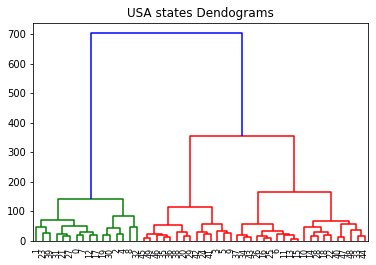

In [19]:
import scipy.cluster.hierarchy as shc

plt.figure()
plt.title("USA states Dendograms")
dend = shc.dendrogram(shc.linkage(cri, method='ward'))  #De acuerdo a análisis visual del dendograma el número de cluster óptimo esta entre 2 y 3.

from sklearn.cluster import AgglomerativeClustering

for x in range(2,4):
  jer_ag = AgglomerativeClustering(n_clusters = x)
  etiq4 = jer_ag.fit_predict(cri)
  cluster7 = []
  cluster8 = []
  cluster9 = []
  for x in range(len(etiq4)):
    if etiq4[x] == 0:
      cluster7.append(crime2.state[x])
    if etiq4[x] == 1:
      cluster8.append(crime2.state[x])
    if etiq4[x] == 2:
      cluster9.append(crime2.state[x])
  print(cluster7)
  print(cluster8)
  print(cluster9,'\n')
